In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("taxi_fare.csv")

# Basic overview
print("Shape of data:", df.shape)
print("\nColumn names:\n", df.columns)
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())


Shape of data: (212345, 18)

Column names:
 Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

Data types:
 VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total

In [2]:
#Date and Time Comvertion
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [3]:
# Check for missing values and duplicates
print("Missing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

Missing values:
 VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

Duplicates: 0


In [4]:
# Display descriptive statistics.
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,212345.000000,212345,212345,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000
mean,1.708338,2016-03-04 20:25:28.105629952,2016-03-04 20:41:37.094412288,1.766493,-73.112122,40.279405,1.034152,-73.144178,40.295648,1.324943,12.665588,0.048077,0.497662,1.809357,0.329049,0.299637,15.649355
min,1.000000,2016-03-01 00:00:00,2016-02-25 09:45:01,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-52.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-52.800000
25%,1.000000,2016-03-01 08:07:45,2016-03-01 08:21:43,1.000000,-73.990891,40.740292,1.000000,-73.990570,40.740089,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,2016-03-01 10:49:12,2016-03-01 11:04:22,1.000000,-73.979469,40.755989,1.000000,-73.978691,40.755508,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000
75%,2.000000,2016-03-10 09:41:04,2016-03-10 09:56:28,2.000000,-73.963295,40.770283,1.000000,-73.964645,40.767475,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.160000
max,2.000000,2016-03-10 14:55:41,2016-03-11 14:51:03,6.000000,0.000000,42.786934,99.000000,0.000000,42.786934,4.000000,819.500000,4.500000,0.500000,218.950000,661.080000,0.300000,832.800000
std,0.454529,NaN,NaN,1.469647,7.936633,4.370714,0.494699,7.794599,4.293031,0.478255,10.875584,0.148103,0.037436,2.507419,2.028199,0.014094,13.592129


In [5]:
#messy data
#fare_amount, tip_amount, total_amount have negatives
#pickup_longitude = 0 (not in NYC)
#max fare_amount = 819.5  seems like outlier...

In [5]:
# Filter out bad rows
df = df[(df['fare_amount'] > 0) &
        (df['total_amount'] > 0) &
        (df['pickup_longitude'] != 0) &
        (df['pickup_latitude'] != 0) &
        (df['dropoff_longitude'] != 0) &
        (df['dropoff_latitude'] != 0) &
        (df['passenger_count'] > 0)]

# See new shape
print("New shape after cleaning:", df.shape)
#1.3% data reduction, not bad.

New shape after cleaning: (209513, 18)


In [9]:
# safer side: create a new copy DataFrame of that dataframe for backup.
import numpy as np
from math import radians, cos, sin, asin, sqrt

df = df.copy()

# trip distance
df.loc[:, 'trip_distance'] = df.apply(lambda row: haversine(
    row['pickup_longitude'], row['pickup_latitude'],
    row['dropoff_longitude'], row['dropoff_latitude']
), axis=1)


In [7]:
#Trip Distance using Haversine formula
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    km = 6371 * c
    return km

# apply row-wise
df['trip_distance'] = df.apply(lambda row: haversine(
    row['pickup_longitude'], row['pickup_latitude'],
    row['dropoff_longitude'], row['dropoff_latitude']
), axis=1)


In [10]:
#Pickup Day, Hour, is_weekend
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['is_weekend'] = df['pickup_day'].isin(['Saturday', 'Sunday']).astype(int)


In [11]:
#am and pm converstion
df['am_pm'] = df['pickup_hour'].apply(lambda x: 'AM' if x <12 else "PM")
df['is_night'] = df['pickup_hour'].apply(lambda x : 1 if (x <= 5 or x >= 22) else 0)


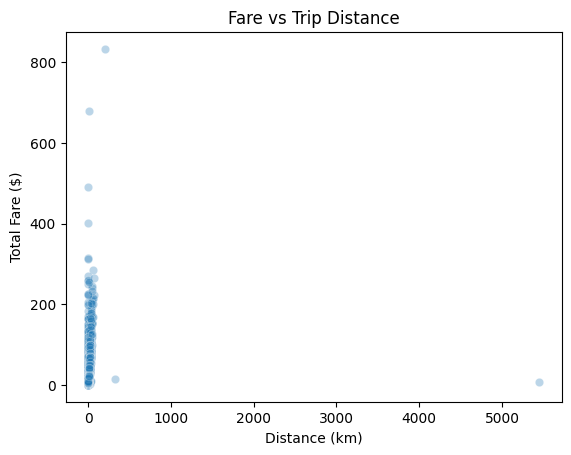

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='trip_distance', y='total_amount', alpha=0.3)
plt.title('Fare vs Trip Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Total Fare ($)')
plt.show()

#most trips are under 30 km
#some outliers... like 5000+ km?maybe GPS errors

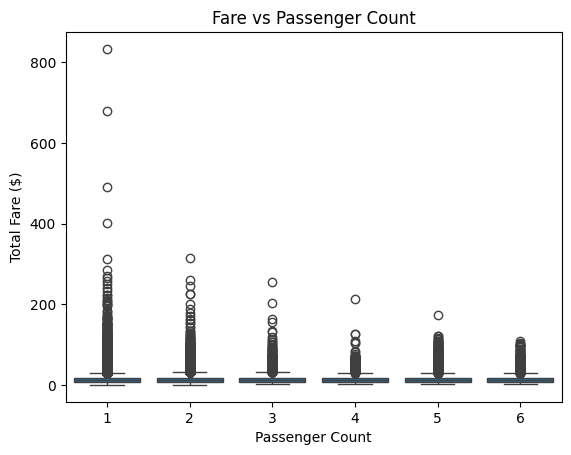

In [ ]:
sns.boxplot(data=df, x='passenger_count', y='total_amount')
plt.title('Fare vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Total Fare ($)')
plt.show()

#fares don’t change much with more passengers 🫢
#most rides are with 1-2 people
#some high fare outliers for solo rides (maybe long trips?)

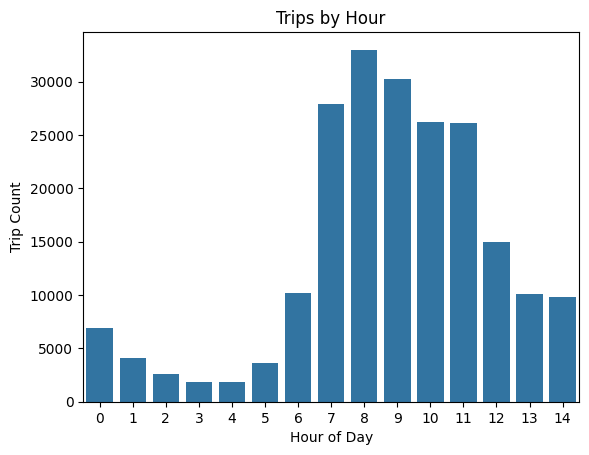

In [ ]:
sns.countplot(data=df, x='pickup_hour')
plt.title('Trips by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Trip Count')
plt.show()

#8–9 AM = peak office hours
#early morning (2–5 AM) = low trips

In [14]:
#Distance Capping
df = df[df['trip_distance'] <= 100]
print("After capping distance:", df.shape)

After capping distance: (209510, 24)


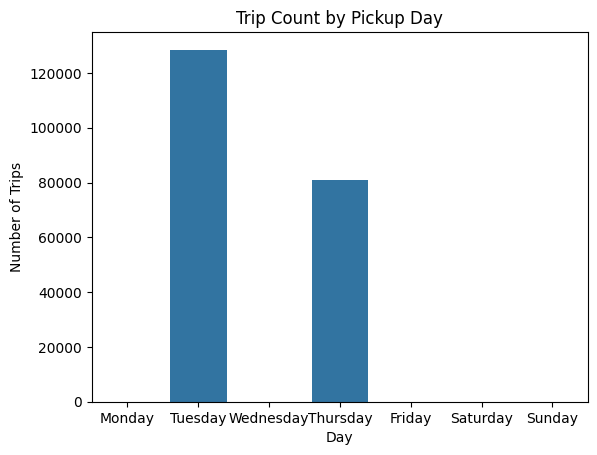

In [15]:
sns.countplot(data=df, x='pickup_day', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Trip Count by Pickup Day')
plt.xlabel('Day')
plt.ylabel('Number of Trips')
plt.show()


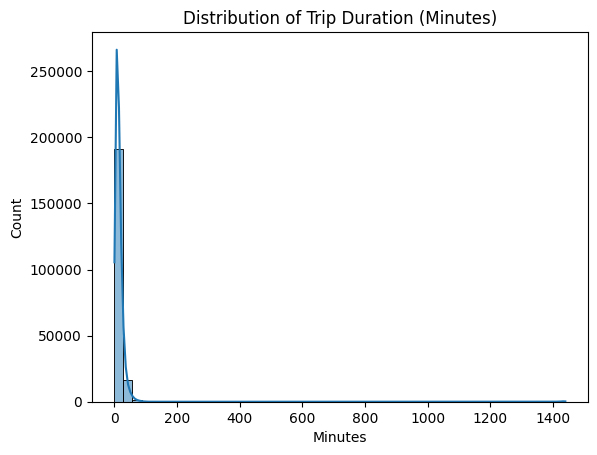

In [16]:
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
sns.histplot(df['trip_duration'], bins=50, kde=True)
plt.title("Distribution of Trip Duration (Minutes)")
plt.xlabel("Minutes")
plt.show()


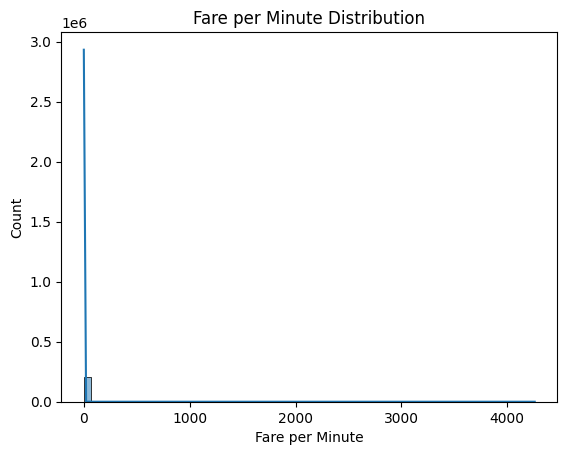

In [17]:
df['fare_per_min'] = df['fare_amount'] / df['trip_duration']
sns.histplot(df['fare_per_min'], bins=60, kde=True)
plt.title("Fare per Minute Distribution")
plt.xlabel("Fare per Minute")
plt.show()


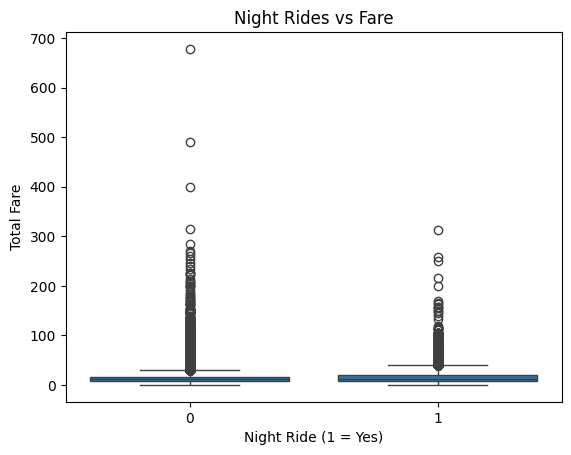

In [18]:
sns.boxplot(data=df, x='is_night', y='total_amount')
plt.title("Night Rides vs Fare")
plt.xlabel("Night Ride (1 = Yes)")
plt.ylabel("Total Fare")
plt.show()


In [13]:
#outliers Treatment
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Apply one by one
for col in ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']:
    df = remove_outliers_iqr(df, col)

print("After outlier treatment:", df.shape)

#15.99% data wiped for feature engineering

After outlier treatment: (175971, 24)


In [14]:
#check for skewness
df[['fare_amount','tip_amount', 'total_amount', 'trip_distance']].skew()

fare_amount      0.833854
tip_amount       0.566863
total_amount     0.792365
trip_distance    0.896960
dtype: float64

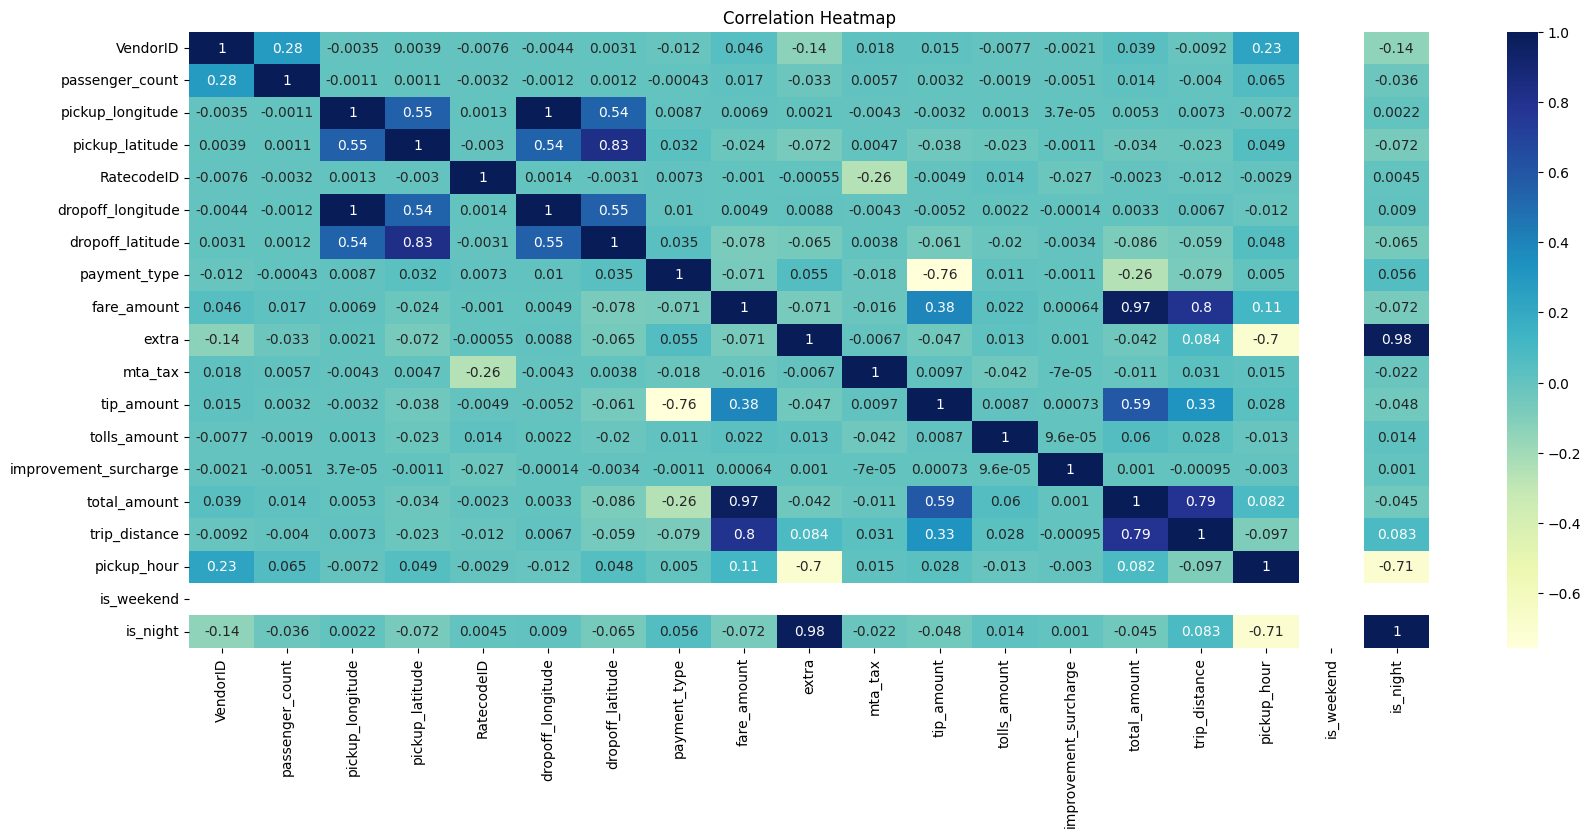

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()
#features to keep
#features = [
#   'trip_distance',
#    'trip_duration',
#    'pickup_hour',
#    'pickup_day',
#    'is_weekend',
#    'is_night',
#    'passenger_count',
#    'RatecodeID',
#    'payment_type',
#    'am_pm'

In [16]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

cat_cols = ['pickup_day', 'RatecodeID', 'payment_type', 'is_weekend', 'am_pm', 'is_night']

for col in cat_cols:
    if df_encoded[col].dtype == 'object':  # only encode if it's a string
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])


In [17]:
#Models to Train

#Linear Regression
#Ridge
#Lasso
#RandomForest
#GradientBoosting

#Evalution
#R²  Score - Coefficient of Determination
#MAE Mean Absolute Error
#RMSE  Root Mean Squared Error
#MSE  Mean Squared Error

#tuning
#ridSearchCV
#RandomizedSearchCV

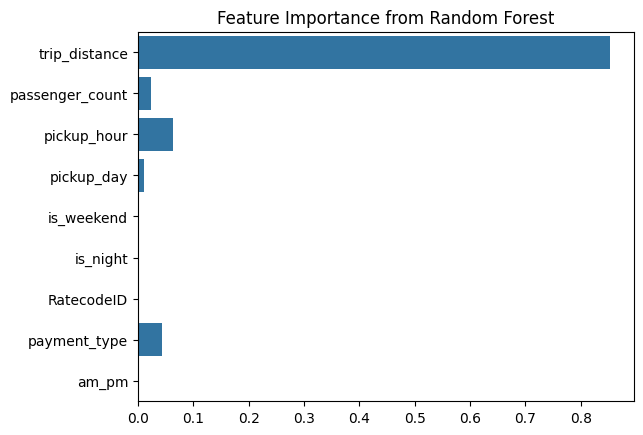

In [18]:
#Random Forest Regressor - Training
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# pick features (you can add more here)
selected_features = ['trip_distance', 'passenger_count', 'pickup_hour',
                     'pickup_day', 'is_weekend', 'is_night',
                     'RatecodeID', 'payment_type', 'am_pm']

X = df_encoded[selected_features]
y = df_encoded['total_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# building model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# get importances
importances = rf.feature_importances_

# plot
sns.barplot(x=importances, y=selected_features)
plt.title("Feature Importance from Random Forest")
plt.show()


In [19]:
# Test
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = rf.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.6432997612415912
MAE: 1.9675503631926543
RMSE: 2.655341549311832


In [20]:
# R2 - your model explains 64% of fare variation
#MAE - on average, fare prediction is off by ~$1.9
#RMSE - error is bigger when extreme fares are involved

In [ ]:
# LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# initialize
lr = LinearRegression()

# fit on training data
lr.fit(X_train, y_train)

# predict
y_pred_lr = lr.predict(X_test)

# evaluate
print("📊 Linear Regression:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


📊 Linear Regression:
R² Score: 0.6160020513404685
MAE: 1.8690433173568626
RMSE: 2.7550732069294086


In [ ]:
#Ridge
#good when we want to control large weights/overfitting
from sklearn.linear_model import Ridge

# initialize with default alpha
ridge = Ridge()

# fit model
ridge.fit(X_train, y_train)

# predict
y_pred_ridge = ridge.predict(X_test)

# evaluate
print("📊 Ridge Regression:")
print("R² Score:", r2_score(y_test, y_pred_ridge))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


📊 Ridge Regression:
R² Score: 0.616177101916648
MAE: 1.8690342895152388
RMSE: 2.7544451669494823


In [ ]:
#Lasso
from sklearn.linear_model import Lasso

# initialize with default alpha
lasso = Lasso()

# fit model
lasso.fit(X_train, y_train)

# predict
y_pred_lasso = lasso.predict(X_test)

# evaluate
print("📊 Lasso Regression:")
print("R² Score:", r2_score(y_test, y_pred_lasso))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))


📊 Lasso Regression:
R² Score: 0.5958519755527489
MAE: 2.1872317878351386
RMSE: 2.826434471852601


In [21]:
#gradient boosting

from sklearn.ensemble import GradientBoostingRegressor

# initialize
gbr = GradientBoostingRegressor()

# fit model
gbr.fit(X_train, y_train)

# predict
y_pred_gbr = gbr.predict(X_test)

# evaluate
print("📊 Gradient Boosting Regressor:")
print("R² Score:", r2_score(y_test, y_pred_gbr))
print("MAE:", mean_absolute_error(y_test, y_pred_gbr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbr)))


📊 Gradient Boosting Regressor:
R² Score: 0.7133433926549893
MAE: 1.7586051913226182
RMSE: 2.38039850804754


In [ ]:
#Conclusion
#| Model                 | R² Score     | MAE        | RMSE       | Verdict        |
#| --------------------- | ------------ | ---------- | ---------- | --------------- |
#| Gradient Boosting |     0.7133**  | **1.75**  | **2.38**  |  Best overall |
#| Random Forest         | 0.6429       | 1.96       | 2.65       | 2nd place       |
#| Linear Regression     | 0.6160       | 1.86       | 2.75       | Simple baseline |
#| Ridge Regression      | 0.6161       | 1.86       | 2.75       | Same as linear  |
#| Lasso Regression      | 0.5958      | 2.18       | 2.82        | Not good here   |


In [22]:
# Import & Set Search Space
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#using gridsearchcv bcoz of 72 combinations only.
# base model
gbr = GradientBoostingRegressor()

# search space
param_grid = {
    'n_estimators': [100, 200], #no of trees
    'learning_rate': [0.05, 0.1, 0.2], # how fast the model learns
    'max_depth': [3, 4, 5], #depth of each tree
    'min_samples_split': [2, 5], # min samples to split node
    'min_samples_leaf': [1, 3] #min samples in leaf
}
#Grid Search
#tries every combo from the grid
#evaluates each one using cross-validation (cv=3)
#picks the one with the best R² score

# grid search setup
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='r2')

#Fit it, tuning starts here.
grid_search.fit(X_train, y_train)

#Best Results
# Best settings

print("Best Parameters:", grid_search.best_params_)

# Use the best model found for prediction
best_gbr = grid_search.best_estimator_


#Predict and evaluate tuned model
# evaluate
y_pred_best = best_gbr.predict(X_test)

print("📊 Tuned Gradient Boosting:")
print("R² Score:", r2_score(y_test, y_pred_best))
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}
📊 Tuned Gradient Boosting:
R² Score: 0.7140706428764215
MAE: 1.7559890320058327
RMSE: 2.377377044953254


In [26]:
import joblib

# Save using joblib
joblib.dump(best_gbr, "best_gbr_model.joblib")


['best_gbr_model.joblib']

In [27]:
import joblib

model = joblib.load("best_gbr_model.joblib")


In [29]:
import pickle

with open("best_gbr_model.pkl", "wb") as file:
    pickle.dump(best_gbr, file)


In [28]:
import pandas as pd

sample_dict = {
    'trip_distance': [3.2],
    'passenger_count': [2],
    'pickup_hour': [14],
    'pickup_day': [1],
    'is_weekend': [0],
    'is_night': [0],
    'RatecodeID': [1],
    'payment_type': [1],
    'am_pm': [1]
}

sample_df = pd.DataFrame(sample_dict)

predicted_fare = best_gbr.predict(sample_df)
print("💸 Predicted Fare:", round(predicted_fare[0], 2))



💸 Predicted Fare: 17.36
